Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [82]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [86]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [112]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("/content/gdrive/MyDrive/Melanoma_Detection/Train")
data_dir_test = pathlib.Path('/content/gdrive/MyDrive/Melanoma_Detection/Test')

In [113]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [114]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [115]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,
                                                               seed = 123,
                                                               validation_split = 0.2,
                                                               subset = 'training',
                                                               image_size = (img_height, img_width),
                                                               batch_size = batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [116]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,
                                                             seed = 123,
                                                             validation_split = 0.2,
                                                             subset = 'validation',
                                                             image_size = (img_height, img_width),
                                                             batch_size = batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [117]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

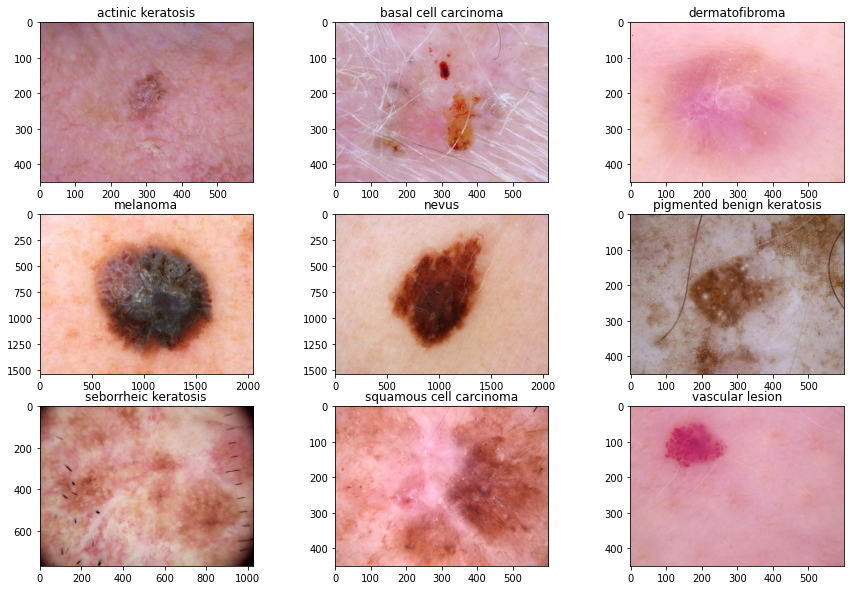

In [118]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize
plt.figure(figsize = [15,10])
for i in range(0,9):
  plt.subplot(3, 3, i+1)
  image = plt.imread(str(list(data_dir_train.glob(class_names[i]+'/*.jpg'))[1]))
  plt.title(class_names[i])
  plt.imshow(image)

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [119]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [120]:
### Your code goes here
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
num_classes = 9
model = Sequential([layers.experimental.preprocessing.Rescaling(1./255,
                                                                input_shape = (img_height, img_width, 3))])
model.add(Conv2D(filters = 32,
                 kernel_size = (5,5),
                 padding = 'Same', 
                 activation ='relu',
                 input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32,
                 kernel_size = (5,5),
                 padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 32,
                 kernel_size = (5,5),
                 padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 64,
                 kernel_size = (5,5),
                 padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 64,
                 kernel_size = (5,5),
                 padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(num_classes, activation = "softmax"))

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [121]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer = 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy'])

In [122]:
# View the summary of all layers
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_15 (Conv2D)          (None, 180, 180, 32)      2432      
                                                                 
 conv2d_16 (Conv2D)          (None, 180, 180, 32)      25632     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 90, 90, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 90, 90, 32)        25632     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 45, 45, 32)       0         
 g2D)                                                 

### Train the model

In [123]:
epochs = 20
history = model.fit(train_ds,
                    validation_data=val_ds,
                    epochs=epochs)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


56/56 [==============================] - 18s 126ms/step - loss: 2.0476 - accuracy: 0.1881 - val_loss: 2.0157 - val_accuracy: 0.2081
Epoch 2/20
56/56 [==============================] - 4s 77ms/step - loss: 1.9521 - accuracy: 0.2584 - val_loss: 1.8416 - val_accuracy: 0.3177
Epoch 3/20
56/56 [==============================] - 4s 76ms/step - loss: 2.0201 - accuracy: 0.2143 - val_loss: 1.9760 - val_accuracy: 0.2237
Epoch 4/20
56/56 [==============================] - 4s 77ms/step - loss: 1.9399 - accuracy: 0.2662 - val_loss: 1.8948 - val_accuracy: 0.2707
Epoch 5/20
56/56 [==============================] - 4s 76ms/step - loss: 1.8643 - accuracy: 0.2913 - val_loss: 1.8561 - val_accuracy: 0.2886
Epoch 6/20
56/56 [==============================] - 4s 77ms/step - loss: 1.8188 - accuracy: 0.3047 - val_loss: 1.8179 - val_accuracy: 0.2908
Epoch 7/20
56/56 [==============================] - 4s 78ms/step - loss: 1.6828 - accuracy: 0.3834 - val_loss: 1.6970 - val_accuracy: 0.3781
Epoch 8/20
56/56 [====

### Visualizing training results

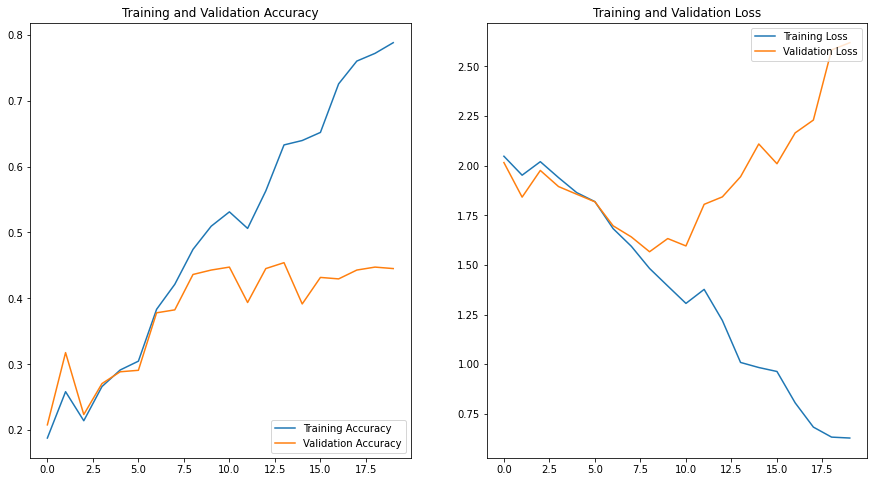

In [124]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

##### 1. The accuracy of the above model is not that great; however, that can be increased by increasing the number of epochs.
##### 2. Looks like the model is grossly overfitting. 

In [125]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here
data_augument = keras.Sequential([layers.experimental.preprocessing.RandomFlip(mode="horizontal_and_vertical",input_shape=(img_height,img_width,3)),
                                  layers.experimental.preprocessing.RandomRotation(0.2, fill_mode='reflect'),
                                  layers.experimental.preprocessing.RandomZoom(height_factor=(0.2, 0.3), width_factor=(0.2, 0.3), fill_mode='reflect')])

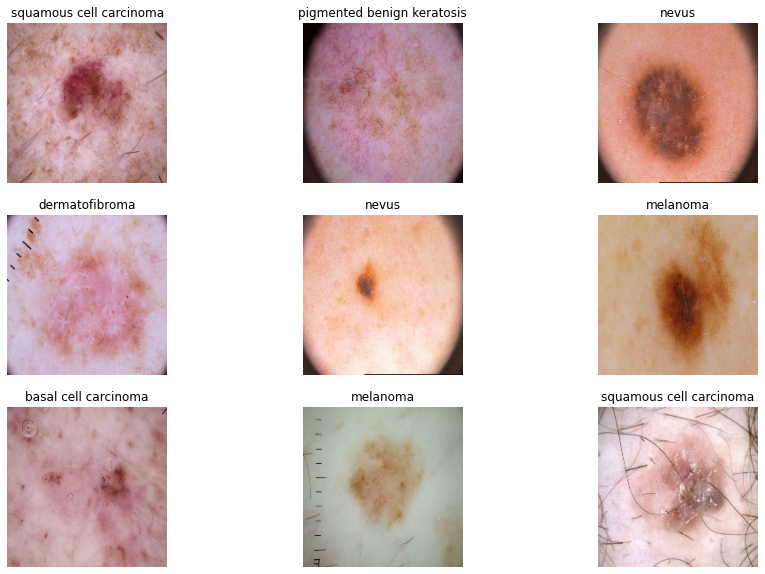

In [126]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here
plt.figure(figsize=(15, 10))
for images, labels in train_ds.take(1):
    for i in range(0,9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(data_augument(images)[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [127]:
## You can use Dropout layer if there is an evidence of overfitting in your findings
## Your code goes here

from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
num_classes = 9
model = Sequential([data_augument,
                    layers.experimental.preprocessing.Rescaling(1./255,
                                                                input_shape=(img_height, img_width,3))])
model.add(Conv2D(filters = 32,
                 kernel_size = (5,5),
                 padding = 'Same', 
                 activation ='relu',
                 input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32,
                 kernel_size = (5,5),
                 padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 64,
                 kernel_size = (5,5),
                 padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 64,
                 kernel_size = (5,5),
                 padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(num_classes, activation = "softmax"))

### Compiling the model

In [128]:
## Your code goes here

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training the model

In [129]:
## Your code goes here, note: train your model for 20 epochs

epochs = 20
history = model.fit(train_ds,
                    validation_data = val_ds,
                    epochs=epochs)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


56/56 [==============================] - 6s 88ms/step - loss: 2.0545 - accuracy: 0.1948 - val_loss: 2.0349 - val_accuracy: 0.1924
Epoch 2/20
56/56 [==============================] - 5s 85ms/step - loss: 2.0247 - accuracy: 0.2009 - val_loss: 2.0275 - val_accuracy: 0.1924
Epoch 3/20
56/56 [==============================] - 5s 86ms/step - loss: 2.0288 - accuracy: 0.1987 - val_loss: 2.0362 - val_accuracy: 0.1924
Epoch 4/20
56/56 [==============================] - 5s 85ms/step - loss: 2.0153 - accuracy: 0.1953 - val_loss: 2.0245 - val_accuracy: 0.2036
Epoch 5/20
56/56 [==============================] - 5s 86ms/step - loss: 2.0224 - accuracy: 0.1998 - val_loss: 2.0273 - val_accuracy: 0.2886
Epoch 6/20
56/56 [==============================] - 5s 85ms/step - loss: 2.0295 - accuracy: 0.1981 - val_loss: 2.0261 - val_accuracy: 0.2058
Epoch 7/20
56/56 [==============================] - 5s 85ms/step - loss: 2.0171 - accuracy: 0.1959 - val_loss: 2.0237 - val_accuracy: 0.2058
Epoch 8/20
56/56 [======

### Visualizing the results

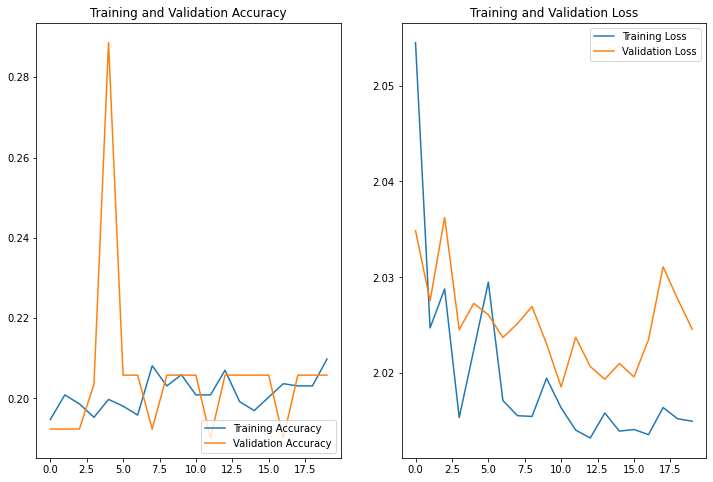

In [130]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

##### 1. The accuracy of the model hasn't been increased as compared to the previous model. There is still a possibility to increase the accuracy of the model if we increase the number of epochs.
##### 2. There seems to be situation of underfitting as there the accuracy for both train and validation set is lower.

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [131]:
## Your code goes here.

path_list=[]
lesion_list=[]

for i in class_names:
  for j in data_dir_train.glob(i+'/*.jpg'):
    path_list.append(str(j))
    lesion_list.append(i)

dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,/content/gdrive/MyDrive/Melanoma_Detection/Tra...,actinic keratosis
1,/content/gdrive/MyDrive/Melanoma_Detection/Tra...,actinic keratosis
2,/content/gdrive/MyDrive/Melanoma_Detection/Tra...,actinic keratosis
3,/content/gdrive/MyDrive/Melanoma_Detection/Tra...,actinic keratosis
4,/content/gdrive/MyDrive/Melanoma_Detection/Tra...,actinic keratosis
...,...,...
2234,/content/gdrive/MyDrive/Melanoma_Detection/Tra...,vascular lesion
2235,/content/gdrive/MyDrive/Melanoma_Detection/Tra...,vascular lesion
2236,/content/gdrive/MyDrive/Melanoma_Detection/Tra...,vascular lesion
2237,/content/gdrive/MyDrive/Melanoma_Detection/Tra...,vascular lesion


In [132]:
original_df.Label.value_counts()

pigmented benign keratosis    462
melanoma                      438
basal cell carcinoma          376
nevus                         357
squamous cell carcinoma       181
vascular lesion               139
actinic keratosis             114
dermatofibroma                 95
seborrheic keratosis           77
Name: Label, dtype: int64

#### **Todo:** Write your findings here: 
##### - 'seborrheic keratosis' class has the least number of samples.
##### - 'pigmented benign keratosis' and 'melanoma' classes dominate the data in terms proportionate number of samples.


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [133]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [139]:
path_to_training_dataset = "/content/gdrive/MyDrive/Melanoma_Detection/Train"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + "/" + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/Melanoma_Detection/Train/actinic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F04DCD6BB50>: 100%|██████████| 500/500 [00:18<00:00, 27.36 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/MyDrive/Melanoma_Detection/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F04DE275990>: 100%|██████████| 500/500 [00:18<00:00, 27.62 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/Melanoma_Detection/Train/dermatofibroma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F04DD70D0D0>: 100%|██████████| 500/500 [00:18<00:00, 27.01 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/MyDrive/Melanoma_Detection/Train/melanoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7F04F20D2E50>: 100%|██████████| 500/500 [01:33<00:00,  5.32 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/Melanoma_Detection/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=724x542 at 0x7F04DD6DCDD0>: 100%|██████████| 500/500 [01:43<00:00,  4.84 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/MyDrive/Melanoma_Detection/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F057070A710>: 100%|██████████| 500/500 [00:18<00:00, 26.49 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/Melanoma_Detection/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F04DCBC3B90>: 100%|██████████| 500/500 [00:43<00:00, 11.61 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/Melanoma_Detection/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F04DC999650>: 100%|██████████| 500/500 [00:17<00:00, 27.98 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/Melanoma_Detection/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F04DD760310>: 100%|██████████| 500/500 [00:18<00:00, 27.02 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [142]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [143]:
from glob import *

path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]

In [144]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]

In [145]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [146]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])

In [147]:
df2['Label'].value_counts()

actinic keratosis             500
basal cell carcinoma          500
dermatofibroma                500
melanoma                      500
nevus                         500
pigmented benign keratosis    500
seborrheic keratosis          500
squamous cell carcinoma       500
vascular lesion               500
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [148]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [149]:
data_dir_train=pathlib.Path("/content/gdrive/MyDrive/Melanoma_Detection/Train")
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,
                                                               seed=123,
                                                               validation_split = 0.2,
                                                               subset = 'training',
                                                               image_size=(img_height, img_width),
                                                               batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [150]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,
                                                             seed=123,
                                                             validation_split = 0.2,
                                                             subset = 'validation',
                                                             image_size=(img_height, img_width),
                                                             batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [151]:
## your code goes here
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
num_classes = 9
model = Sequential([layers.experimental.preprocessing.Rescaling(1./255,
                                                                input_shape=(img_height, img_width,3))])

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(num_classes, activation = "softmax"))

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [152]:
## your code goes here

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [153]:
epochs = 50
## Your code goes here, use 50 epochs.
history = model.fit(train_ds,
                    validation_data = val_ds,
                    epochs=epochs)

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


169/169 [==============================] - 35s 198ms/step - loss: 2.1866 - accuracy: 0.1493 - val_loss: 2.1852 - val_accuracy: 0.1403
Epoch 2/50
169/169 [==============================] - 34s 193ms/step - loss: 2.1780 - accuracy: 0.1367 - val_loss: 2.1926 - val_accuracy: 0.1403
Epoch 3/50
169/169 [==============================] - 33s 192ms/step - loss: 2.1789 - accuracy: 0.1419 - val_loss: 2.1860 - val_accuracy: 0.1433
Epoch 4/50
169/169 [==============================] - 33s 190ms/step - loss: 2.2296 - accuracy: 0.1434 - val_loss: 2.1984 - val_accuracy: 0.1396
Epoch 5/50
169/169 [==============================] - 34s 197ms/step - loss: 2.1780 - accuracy: 0.1397 - val_loss: 2.1823 - val_accuracy: 0.1448
Epoch 6/50
169/169 [==============================] - 33s 189ms/step - loss: 2.1732 - accuracy: 0.1417 - val_loss: 2.1835 - val_accuracy: 0.1433
Epoch 7/50
169/169 [==============================] - 33s 190ms/step - loss: 2.1674 - accuracy: 0.1491 - val_loss: 2.1689 - val_accuracy: 0.1

#### **Todo:**  Visualize the model results

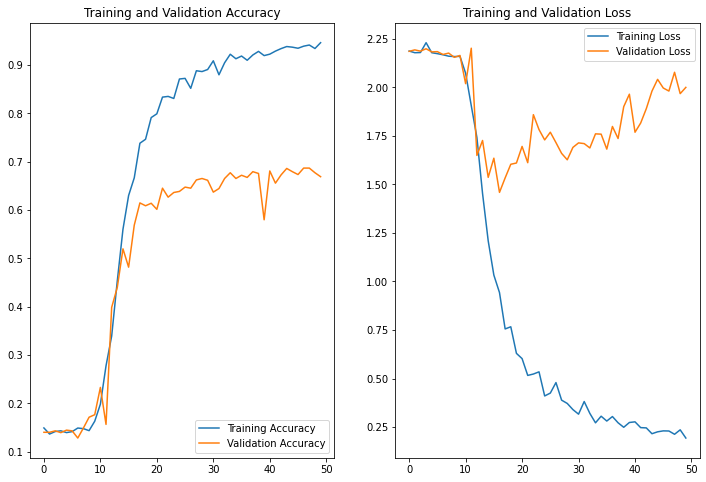

In [155]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?

##### 1. Accuracy on training data has increased by using Augmentor library.
##### 2. Model is still overfitting.
##### 3. The problem of overfitting can be solved by add more layer,neurons or adding dropout layers.
##### 4. The Model can be further improved by tuning the hyperparameter.

